In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

2.8.0


In [ ]:
mnist = keras.datasets.mnist # 손글씨 데이터

(x_train,y_train),(x_test,y_test) = mnist.load_data()
# x_train: 6만개의 이미지 (60000,28,28)
# y_train: 6만개의 값에 대한 레이블  (60000,)
# x_test, y_test : 1만개의 테스트 데이터 
x_train,x_test = x_train / 255.0, x_test / 255.0

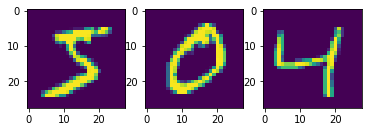

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

ax1.imshow(x_train[0])
ax2.imshow(x_train[1])
ax3.imshow(x_train[2])
plt.show()


In [ ]:
# 신경망 모델 (총 4개의 레이어로 구성된 신경망)
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)), # 입력 이미지의 크기 28*28
  tf.keras.layers.Dense(128,activation='relu'), # 784개값 -> 128개 인코딩, 활성함수를 ReLU 사용
  tf.keras.layers.Dropout(0.2), # 20%를 다음 레이어 입력에서 무시
  tf.keras.layers.Dense(10,activation='softmax') # 10값 출력. 활성함수 Softmax 사용
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


총 4개의 레이어로 구성된 신경망인데, 1번째 레이어는 입력 이미지의 크기가 28×28이므로 이를 1차원 텐서로 펼치는 것이고, 2번째 레이어는 1번째 레이어에서 제공되는 784 개의 값(28×28)을 입력받아 128개의 값으로 인코딩해 주는데, 활성함수로 ReLU를 사용하도록 하였습니다. 2번째 레이어의 실제 연산은 1번째 레이어에서 제공받은 784개의 값을 784×128 행렬과 곱하고 편향값을 더하여 얻은 128개의 출력값을 다시 ReLU 함수에 입력해 얻은 128개의 출력입니다. 3번째는 128개의 뉴런 중 무작위로 0.2가 의미하는 20%를 다음 레이어의 입력에서 무시합니다. 이렇게 20% 정도가 무시된 값이 4번째 레이어에 입력되어 충 10개의 값을 출력하는데, 여기서 사용되는 활성화 함수는 Softmax가 사용되었습니다. Softmax는 마지막 레이어의 결과값을 다중분류를 위한 확률값으로 해석할 수 있도록 하기 위함입니다. 10개의 값을 출력하는 이유는 입력 이미지가 0~9까지의 어떤 숫자를 의미하는지에 대한 각각의 확률을 얻고자 함입니다. 

In [ ]:
batch_size = 64
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# 역전파를 통한 가중치 최적화를 위한 기울기 방향에 대한 경사하강 방법: adam
# 손실 함수: Cross Entropy Error인 ‘sparse_categorical_crossentropy’
# 모델 평가를 위한 평가 지표:'accuracy'
log_dir = './logs/tensorflow'
tensorboard_cb = keras.callbacks.TensorBoard(log_dir)
model.fit(x_train,y_train,batch_size=batch_size,epochs=10,callbacks=[tensorboard_cb])
# epoch: 전체 데이터셋에 대해서 한번 학습할때의 단위

Epoch 1/10
938/938 [==============================] - 4s 3ms/step - loss: 0.3444 - accuracy: 0.9011
Epoch 2/10
938/938 [==============================] - 3s 3ms/step - loss: 0.1658 - accuracy: 0.9510
Epoch 3/10
938/938 [==============================] - 3s 3ms/step - loss: 0.1215 - accuracy: 0.9640
Epoch 4/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0988 - accuracy: 0.9701
Epoch 5/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0837 - accuracy: 0.9740
Epoch 6/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0737 - accuracy: 0.9773
Epoch 7/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0659 - accuracy: 0.9796
Epoch 8/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0587 - accuracy: 0.9815
Epoch 9/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0528 - accuracy: 0.9825
Epoch 10/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0478 - accuracy: 0.9849

In [ ]:
test_loss, test_acc = model.evaluate(x_test,y_test,verbose=2)
print('Test Accuracy:',test_acc)
print('Test Lost:',test_loss)

313/313 - 1s - loss: 0.0675 - accuracy: 0.9809 - 583ms/epoch - 2ms/step
Test Accuracy: 0.98089998960495
Test Lost: 0.06750360131263733
